In [35]:
# Importing required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
alt.data_transformers.enable('default', max_rows=None)

pd.set_option('display.max_columns', 30)
# pd.options.display.max_rows = 1050

In [36]:
import json  # need it for json.dumps
from IPython.display import HTML

# Create the correct URLs for require.js to find the Javascript libraries
vega_url = 'https://cdn.jsdelivr.net/npm/vega@' + alt.SCHEMA_VERSION
vega_lib_url = 'https://cdn.jsdelivr.net/npm/vega-lib'
vega_lite_url = 'https://cdn.jsdelivr.net/npm/vega-lite@' + alt.SCHEMA_VERSION
vega_embed_url = 'https://cdn.jsdelivr.net/npm/vega-embed@3'
noext = "?noext"

altair_paths = {
    'vega': vega_url + noext,
    'vega-lib': vega_lib_url + noext,
    'vega-lite': vega_lite_url + noext,
    'vega-embed': vega_embed_url + noext
}

workaround = """
requirejs.config({{
    baseUrl: 'https://cdn.jsdelivr.net/npm/',
    paths: {paths}
}});
"""

# Define the function for rendering
def add_autoincrement(render_func):
    # Keep track of unique <div/> IDs
    cache = {}
    def wrapped(chart, id="vega-chart", autoincrement=True):
        """Render an altair chart directly via javascript.
        
        This is a workaround for functioning export to HTML.
        (It probably messes up other ways to export.) It will
        cache and autoincrement the ID suffixed with a
        number (e.g. vega-chart-1) so you don't have to deal
        with that.
        """
        if autoincrement:
            if id in cache:
                counter = 1 + cache[id]
                cache[id] = counter
            else:
                cache[id] = 0
            actual_id = id if cache[id] == 0 else id + '-' + str(cache[id])
        else:
            if id not in cache:
                cache[id] = 0
            actual_id = id
        return render_func(chart, id=actual_id)
    # Cache will stay defined and keep track of the unique div Ids
    return wrapped


@add_autoincrement
def render_alt(chart, id="vega-chart"):
    # This below is the javascript to make the chart directly using vegaEmbed
    chart_str = """
    <div id="{id}"></div><script>
    require(["vega-embed"], function(vegaEmbed) {{
        const spec = {chart};     
        vegaEmbed("#{id}", spec, {{defaultStyle: true}}).catch(console.warn);
    }});
    </script>
    """
    return HTML(
        chart_str.format(
            id=id,
            chart=json.dumps(chart) if isinstance(chart, dict) else chart.to_json(indent=None)
        )
    )

HTML("".join((
    "<script>",
    workaround.format(paths=json.dumps(altair_paths)),
    "</script>"
)))

In [37]:
df1 = pd.read_csv("C:/Users/admin/Downloads/Cars93.csv")
df1 = df1.drop(['Unnamed: 0'], axis = 1)

In [38]:
df1.rename(columns={'MPG.city':'MPGC'}, inplace=True)
df1.rename(columns={'MPG.highway':'MPGH'}, inplace=True)
df1.rename(columns={'Luggage.room':'Luggroom'}, inplace=True)
df1.rename(columns={'Fuel.tank.capacity':'Fuelcapacity'}, inplace=True)
df1.rename(columns={'Man.trans.avail':'Gear'}, inplace=True)
df1.rename(columns={'Rev.per.mile':'RevMile'}, inplace=True)
df1.rename(columns={'Turn.circle':'Turn.circle'}, inplace=True)
df1.rename(columns={'Rear.seat.room':'RearseatRoom'}, inplace=True)
df1.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPGC,MPGH,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,RevMile,Gear,Fuelcapacity,Passengers,Length,Wheelbase,Width,Turn.circle,RearseatRoom,Luggroom,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
#In this interactive visualization we are comparing horsepower with the engine size of different type of vehicles so that the potential buyer can select a usa or a non-usa origin vehicle inrespect with higher or lower horsepower/engine size and get to see the number of Cars available in different categories. 

In [47]:
interval = alt.selection_interval()

points = alt.Chart(df1).mark_point().encode(
  x='Horsepower',
  y='EngineSize',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(df1).mark_bar().encode(
  x='count()',
  y='Type',
  color='Type'
).transform_filter(interval)

render_alt(points & histogram)

In [ ]:
#The graph shows the miles per gallon in the city in respect to horsepower, engine size & weight of the car. This gives an idea to the customer of how the engine size and horsepower affects the mileage which in turns shows the fuel efficiency versus the power of the car so that they can choose whether they want a faster car or a car with more fuel efficiency.

In [40]:
interval = alt.selection_interval()

base = alt.Chart(df1).mark_point().encode(
  y='EngineSize',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

render_alt(base.encode(x='Weight') | base.encode(x='MPGC'))

In [ ]:
#This graph shows the different prices of distinguished car types with respect to different manufactures and the mean price is also given so that customers will get the idea of what all cars are available below the mean price value and vice-versa. It allows the customer to easily segregate the car types and manufacturers according to different variety of prices

In [41]:
points = alt.Chart(df1).mark_point().encode(
  x='Manufacturer',
  y='Price',
  color='Type'
).properties(
  width=800
)

lines = alt.Chart(df1).mark_line().encode(
  x='Manufacturer',
  y='mean(Price)',

).properties(
  width=800
).interactive()
              
render_alt(points + lines)

In [ ]:
#The graph gives us information on the number of vehicles available in each manufacturer with respect to different types of cars. The legend explains the type of variety of cars for each company. Easy for customer to sort out different companies in the decision making process of prioritising manufacturers.

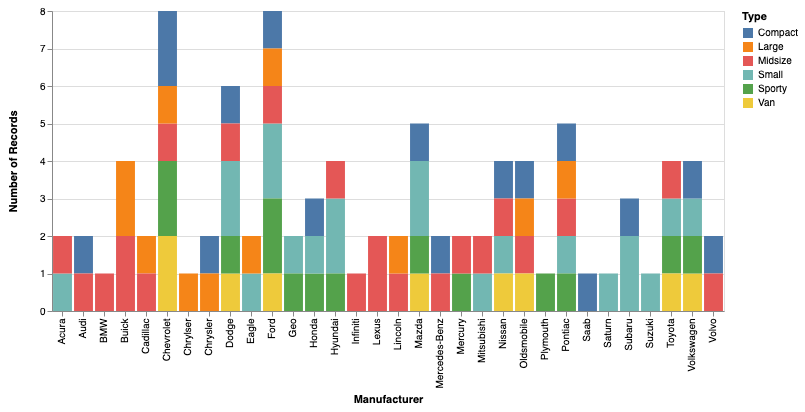

In [52]:
alt.Chart(df1).mark_bar().encode(
    x='Manufacturer',
    y='count()',
    color="Type",
)

In [ ]:
#The graph shows the miles per gallon in the city in respect to horsepower, engine size & weight of the car. This gives an idea to the customer of how the engine size and horsepower affects the mileage which in turns shows the fuel efficiency versus the power of the car so that they can choose whether they want a faster car or a car with more fuel efficiency.

In [42]:
chart4 = alt.Chart(df1).mark_circle().encode(
    alt.X('Horsepower', scale=alt.Scale(zero=False)),
    alt.Y('MPGH', scale=alt.Scale(zero=False, padding=1)),
    color='EngineSize',
    size='Weight'
).interactive()
render_alt(chart4)

In [43]:
chart5 = alt.Chart(df1).mark_line().encode(
    x='Manufacturer',
    y=alt.Y('mean(Horsepower)')
).interactive()
render_alt(chart5)

In [ ]:
#This graph gives a brief idea about safety features of a car and the availability of that feature across various manufacturers. Here the graph shows the different manufacturers and their different types of cars with number of passengers having airbags for driver &passenger,driver only & no airbags. This gives the customer information regarding the safety features and selects the car according to their needs.

In [46]:
interval = alt.selection_interval()

base = alt.Chart(df1).mark_point().encode(
  y='Passengers',
  color=alt.condition(interval, 'Type', alt.value('lightgray'))
).properties(
  selection=interval
)

render_alt(base.encode(x='AirBags') | base.encode(x='Manufacturer'))

In [ ]:
#This box plot graph gives the potential buyer about the idea of average mileage of the total number of cars present in the company. 

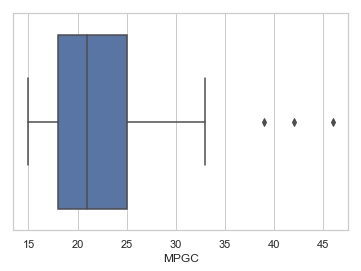

In [56]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["MPGC"])

In [ ]:
#The graph shows the different manufacturers and the number of cars equipped with manual transmission. Gives customer a brief idea on which of the companies provide car with manual gear system so that they can prioritise their needs to buy one

In [45]:
chart3 = alt.Chart(df1).mark_bar().encode(
    x='Gear',
    y='count()',
    color='Gear',
    column='Manufacturer'
)

render_alt(chart3)

In [ ]:
#Here the graph shows the miles per gallon of the cars available and their number in the store differentiating with the variety in type. This shows the customer that, for example if we take vans with fuel efficiency the graph will show how many vans are left in the company with certain mileage to be sold to the customers. 

In [33]:
chart2 = alt.Chart(df1).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('MPGC', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Type'
    )
).interactive()

render_alt(chart2)

In [ ]:
#This is a prioritised graph, given the criteria that a customer is looking for a vehicle with larger size (width wise) and a larger fuel capacity can see the number of cars available in the company.

In [31]:
chart1 = alt.Chart(df1).mark_rect().encode(
    alt.X('Width', bin=True),
    alt.Y('Fuelcapacity', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
).interactive()

render_alt(chart1)